# Data Visualization & Tidying Lab

This notebook is split into **two parts**:

1. **Core skills tutorial** – short walkthroughs that demonstrate standard Python data-visualization techniques with `matplotlib`, `seaborn`, and `pandas`.  
2. **Applied challenges** – five messy, simulated data sets accompanied by stakeholder-style questions that someone might ask you to answer. Your task is to tidy each data set and write a brief data story for your audience with visuals.



## Part 1 – Core Visualization Skills 

### 1. Line, scatter, bar – the classics

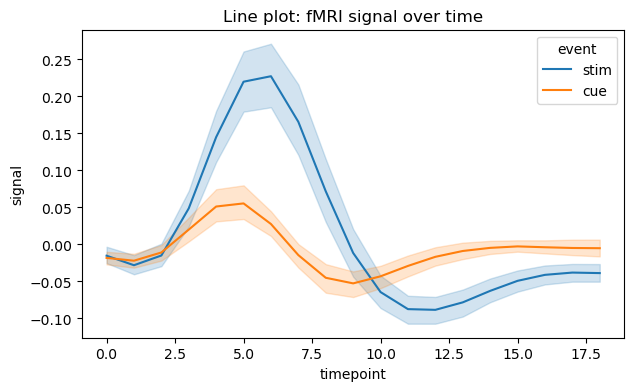

In [2]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

# Load example
fmri = sns.load_dataset('fmri')

# LINE PLOT — average signal over time for each event type
plt.figure(figsize=(7,4))
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event') 
plt.title('Line plot: fMRI signal over time')
plt.show()



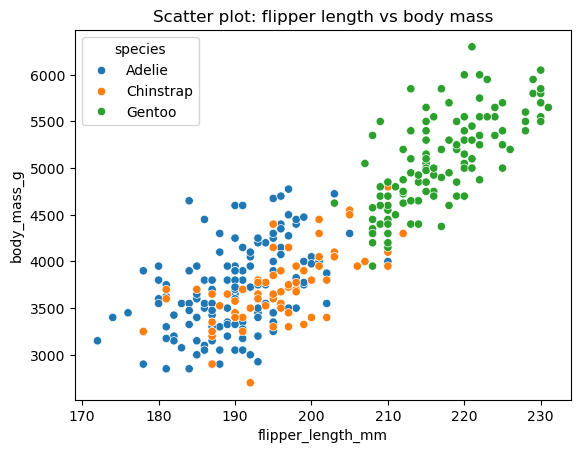

In [3]:
# SCATTER PLOT — flipper vs body mass
penguins = sns.load_dataset('penguins').dropna()
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter plot: flipper length vs body mass')
plt.show()



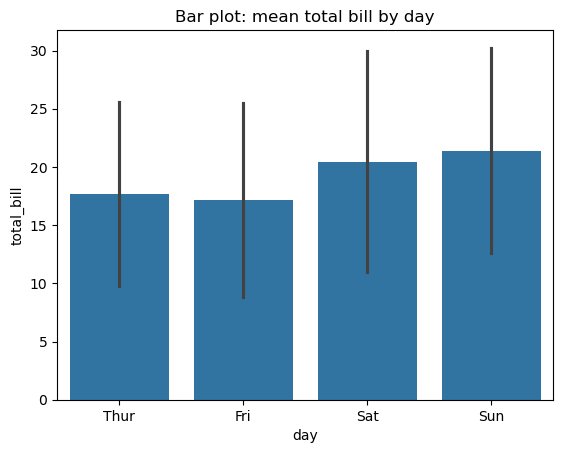

In [4]:
# BAR PLOT — mean total bill by day
tips = sns.load_dataset('tips')
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd')
plt.title('Bar plot: mean total bill by day')
plt.show()

These three basic plotting examples cover **quantitative over time**, **relationship between two numeric variables**, and **comparisons across categories**. Remember to always label axes and provide context in titles or captions.

### 2. Distributions – histograms, KDEs, box/violin

Use **histograms/KDEs** for a single distribution and **box/violin** plots for comparing distributions across groups.

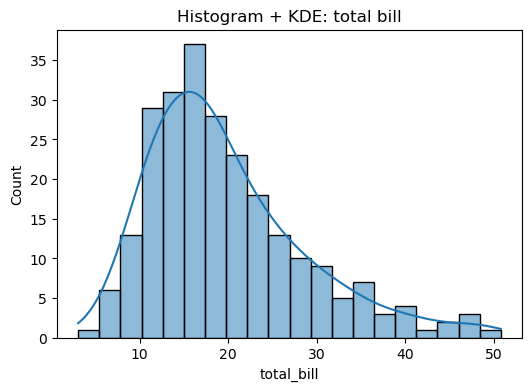

In [5]:
# Histogram + KDE overlay for 'total_bill'
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Histogram + KDE: total bill')
plt.show()


#### What is a KDE and why would you ever want one? 

A KDE (kernel density estimate) is a way to visualize the distribution of the data.

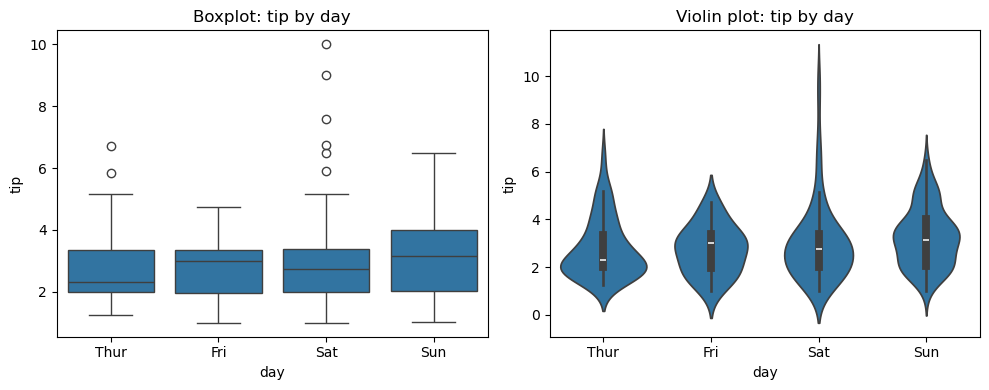

In [6]:
# Box & violin plots side-by-side
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0])
ax[0].set_title('Boxplot: tip by day')
sns.violinplot(data=tips, x='day', y='tip', ax=ax[1])
ax[1].set_title('Violin plot: tip by day')
plt.tight_layout()
plt.show()

#### Why would you want to use a boxplot over a violin plot and vice versa?

A violin plot shows the distribution of the data, which may be helpful for seeing patterns in the data. A box plot is more helpful for seeing the presence of outliers (shown as dots beyond the "whiskers").

### 3. Multi-dimensional encodings – color, size & facets

In [ ]:
# Bubble plot: GDP vs life expectancy, bubble size = population
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
year2007 = gap[gap.year == 2007]

plt.figure(figsize=(8,5))
sns.scatterplot(data=year2007, x='gdpPercap', y='lifeExp',
                size='pop', hue='continent', sizes=(40,400), alpha=0.7, legend=False)
plt.xscale('log')
plt.title('Bubble plot: GDP vs Life Expectancy (2007)')
plt.show()

# Facet grid
g = sns.relplot(data=gap, x='gdpPercap', y='lifeExp',
                col='continent', col_wrap=3,
                kind='scatter', height=3, alpha=0.6, facet_kws={'sharex':False})
g.set(xscale='log')

color, point size, and faceting let you incorporate **additional variables** without clutter.

### 4. Time series & multiple lines

In [ ]:
# Flights example
flights = sns.load_dataset('flights')
pivot = flights.pivot(index='month', columns='year', values='passengers')

pivot.plot(figsize=(10,5))
plt.title('Monthly air passengers (1949-1960)')
plt.ylabel('Passengers')
plt.legend(loc='upper left', ncol=4, title='Year')
plt.show()

Pivoting long-format data wide can make multi-line time-series plots straightforward.

### 5. Customising aesthetics

In [ ]:
# Global Seaborn style
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.1)

plt.figure(figsize=(6,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Total bill by day & biological sex')
plt.xlabel('Day of week')
plt.ylabel('Total bill ($)')
sns.despine()
plt.show()

Small touches (despine, style, context, custom palettes) go a long way to professional-looking figures.

## Part 2 – Applied Challenges

Below are five *realistic* messy data sets.  
For **each**:

1. **Run** the *Generate the data* cell to create a DataFrame `df`.  
2. Inspect & **tidy** it into a clean, analysis-ready form (remember *Tidy ≡ one variable per column, one observation per row*).  
3. **Answer the questions** in a concise written report (use the provided headings).  
4. Support your conclusions with **at least two visualizations** (feel free to create more).

### Report template (copy for each dataset)
- **Context** – restate the stakeholder’s objective in 1-2 sentences.  
- **Tidying steps** – bullet list of wrangling operations applied.  
- **Findings** – describe what the visuals show.  
- **Recommendations** – actionable insights for the stakeholder.


### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any patterns.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar patterns over the year?

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there any individual variability?

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any seasonality.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar seasonal patterns?

In [ ]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    np.random.seed(0)
    months = list(range(1,13))
    regions = ['North', 'South', 'East', 'West']
    data = {}
    for r in regions:
        for m in months:
            col = f"{r[:2]}_{m}"
            data[col] = np.random.poisson(lam=2000 + 100*m + 400*regions.index(r), size=3)
    df = pd.DataFrame(data)
    df['Product'] = ['Gizmo', 'Widget', 'Doohickey']
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

#### Your analysis below

In [ ]:
# TODO: tidy the data, visualize, and answer questions


### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

In [ ]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    times = pd.date_range('2025-01-01', periods=48, freq='H')
    sensors = [f"S{i}" for i in range(1,6)]
    rows = []
    for t in times:
        row = {'timestamp': t}
        for s in sensors:
            temp = np.random.normal(20,3)
            hum = np.random.uniform(30,70)
            row[s] = f"{temp:.1f}|{hum:.0f}"
        rows.append(row)
    return pd.DataFrame(rows)


df = _simulate()
print("Shape:", df.shape)
df.head()

#### Your analysis below

In [ ]:
# TODO: tidy the data, visualize, and answer questions


### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

In [ ]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    n = 200
    choices = ['Python', 'R', 'MATLAB', 'JavaScript']
    data = {
        'respondent_id': range(1,n+1),
        'age_group': np.random.choice(['18-24','25-34','35-44','45+'], n),
        'tools_used': [', '.join(np.random.choice(choices, size=np.random.randint(1,4), replace=False)) for _ in range(n)],
        'satisfaction_1-5': np.random.randint(1,6, n)
    }
    return pd.DataFrame(data)


df = _simulate()
print("Shape:", df.shape)
df.head()

#### Your analysis below

In [ ]:
# TODO: tidy the data, visualize, and answer questions


### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there significant individual variability?

In [ ]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    subjects = [f"Subj_{i:03d}" for i in range(1,51)]
    conditions = ['placebo','drugA','drugB']
    df = pd.DataFrame({'subject': subjects})
    for c in conditions:
        df[f"bp_pre_{c}"] = np.random.normal(120,10, len(subjects))
        df[f"bp_post_{c}"] = df[f"bp_pre_{c}"] - np.random.normal(5,2, len(subjects)) + (0 if c=='placebo' else  -10 + 5*conditions.index(c))
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

#### Your analysis below

In [ ]:
# TODO: tidy the data, visualize, and answer questions


### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

In [ ]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    dates = pd.date_range('2024-07-01', '2024-12-31', freq='D')
    platforms = ['TikTok','Instagram','YouTube']
    rows = []
    for d in dates:
        for p in platforms:
            views = np.random.randint(1000, 100000)
            likes = int(views * np.random.uniform(0.05, 0.2))
            rows.append({'date': d, 'platform': p, 'views': f"{views/1000:.1f}k", 'likes': likes if np.random.rand()>0.05 else np.nan})
    df = pd.DataFrame(rows)
    dup = df.sample(200)
    df = pd.concat([df, dup], ignore_index=True).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

#### Your analysis below

In [ ]:
# TODO: tidy the data, visualize, and answer questions
